In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import poisson

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

# **Basic steps**

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
#check duplicated values
df.Name.duplicated().any()

False

In [8]:
df.duplicated().value_counts()

False    891
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Handling Null values**

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# AS S is most occurred element in column
df['Embarked'].fillna("S", inplace = True)

In [14]:
#Mean before handling null values 
df['Age'].mean()

29.69911764705882

In [15]:
#missing values are filled by the value in previous column
df['Age'].fillna( method ='ffill', inplace = True)

In [16]:
#Mean after handling null values
df['Age'].mean()

29.581560044893376

# **Survived analysis**

In [17]:
#replacing 1 and 0 as per condition for better usage
df['Survived']=df['Survived'].astype("string")
df['Survived'].replace('0','Died',inplace=True)
df['Survived'].replace('1','Survived',inplace=True)

In [18]:
df['Survived'].value_counts()

Died        549
Survived    342
Name: Survived, dtype: Int64

In [19]:
px.histogram(df,x='Survived',color='Survived',text_auto='3s',title='Analysis of People survived',width=800,height=500)

# **No. of People survived/died based on gender**

In [20]:
dfsu = df.groupby(['Survived','Sex']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()

In [21]:
dfsu

,Survived,Sex,0
0,Died,male,468
1,Survived,female,233
2,Survived,male,109
3,Died,female,81


In [22]:
fig= px.bar(dfsu,x='Survived',y=0,color='Sex',text_auto='0.03')
fig.update_layout(
                 title='No. of People survived/died based on gender',
                 xaxis_title="Survived/Died",
                 yaxis_title="No. of people")

fig.show()

# **Sex analysis**

In [23]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
px.histogram(df,x='Sex',color='Sex',text_auto='3s',title='Analysis of People Sex',width=800,height=500)

# **Age_group analysis**

In [25]:
df['Age'].describe()

count    891.00000
mean      29.58156
std       14.55459
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       80.00000
Name: Age, dtype: float64

In [26]:
bins = [0,10, 20, 30, 40,50,60]
names = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60','60-70']

d = dict(enumerate(names, 1))
df['Age_Range'] = np.vectorize(d.get)(np.digitize(df['Age'], bins))

In [27]:
df['Age_Range'].value_counts()

20-30    266
30-40    211
10-20    129
40-50    111
0-10      82
50-60     62
60-70     30
Name: Age_Range, dtype: int64

In [28]:
px.histogram(df,x='Age_Range',color='Age_Range',title='Age group of passangers',text_auto='3s')

# **Fare analysis**

In [29]:
mean_value=df['Fare'].mean()

## **Replacing null values**

In [30]:
#df['Fare'].fillna( method ='ffill', inplace = True)

In [31]:
df['Fare'].fillna( value=mean_value, inplace = True)

In [32]:
bins = [0,10,20,50,100,150,200,250,600]
names = ['0-10','10-20','20-50','50-100','100-150','150-200','200-250','250+']

d = dict(enumerate(names, 1))
df['Fare_g'] = np.vectorize(d.get)(np.digitize(df['Fare'], bins))

In [33]:
px.histogram(df,x='Fare_g',color='Fare_g',title='Fare group of passangers',text_auto='3s')

# **PClass analysis**

In [34]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [35]:
df['Pclass']=df['Pclass'].astype(str)

In [36]:
df['Pclass'].replace('3','class3',inplace=True)
df['Pclass'].replace('2','class2',inplace=True)
df['Pclass'].replace('1','class1',inplace=True)

In [37]:
df['Pclass'].value_counts()

class3    491
class1    216
class2    184
Name: Pclass, dtype: int64

In [38]:
px.histogram(df,x='Pclass',color='Pclass',title='Distinguishing of different class',text_auto='3s')

# **Number of siblings analysis**

In [39]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Number of siblings')

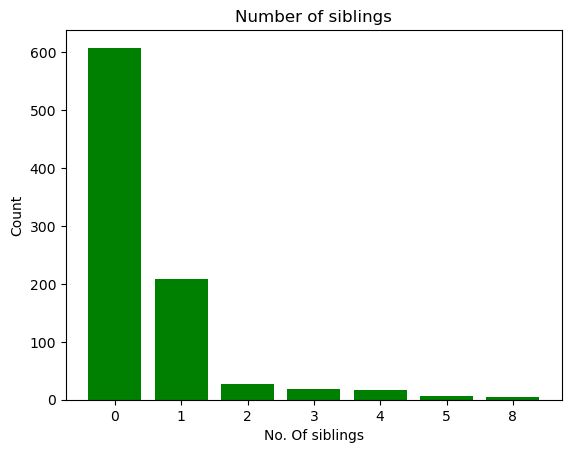

In [40]:
labels = ['0','1','2','3','4','5','8']
plt.xlabel('No. Of siblings')
plt.ylabel('Count')
plt.bar(labels, df['SibSp'].value_counts(),color='green')
plt.title('Number of siblings')


# **Embarked analysis**

In [41]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
px.histogram(df,x='Embarked',color='Embarked',title='Embarked analysis',text_auto='3s')


# **Cabin info**

In [43]:
#As cabin column is having 80% of null values so we cant substitute any value as we dont have info about it
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

# **Grouping data of Embarked with sex**

In [44]:
df.groupby("Embarked").agg({'Sex': lambda x: x.value_counts()})

,Sex
Embarked,
C,"[95, 73]"
Q,"[41, 36]"
S,"[441, 205]"


Text(0.5, 1.0, 'Embarked with sex demographic')

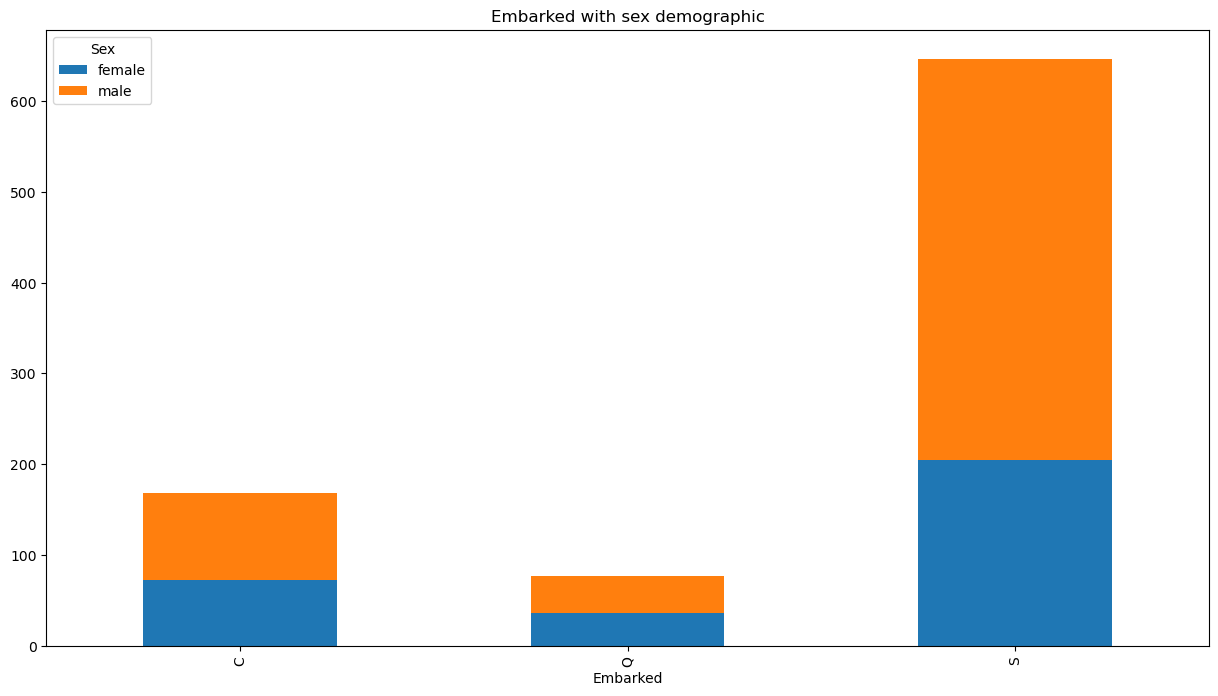

In [45]:

df.groupby('Embarked')['Sex'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True,figsize=(15,8))
plt.title('Embarked with sex demographic')

# **Grouping data of Embarked with pclass**

In [46]:
df.groupby("Embarked").agg({'Pclass': lambda x: x.value_counts()})

,Pclass
Embarked,
C,"[85, 66, 17]"
Q,"[72, 3, 2]"
S,"[353, 164, 129]"


Text(0.5, 1.0, 'Embarked with Pclass')

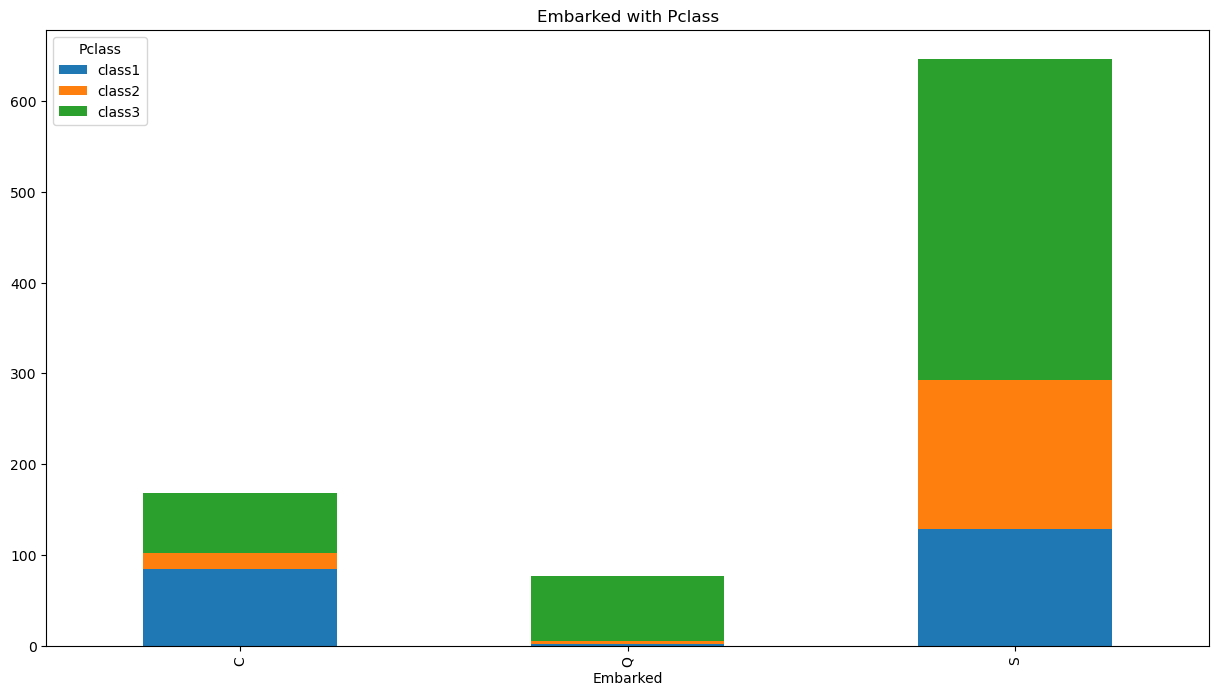

In [47]:

df.groupby('Embarked')['Pclass'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True,figsize=(15,8))

plt.title('Embarked with Pclass')

# **Grouping data of Age_range with sex**

In [48]:
df.groupby("Age_Range").agg({'Sex': lambda x: x.value_counts()})

,Sex
Age_Range,
0-10,"[48, 34]"
10-20,"[75, 54]"
20-30,"[182, 84]"
30-40,"[137, 74]"
40-50,"[69, 42]"
50-60,"[43, 19]"
60-70,"[23, 7]"


Text(0.5, 1.0, 'Age_Range with Sex')

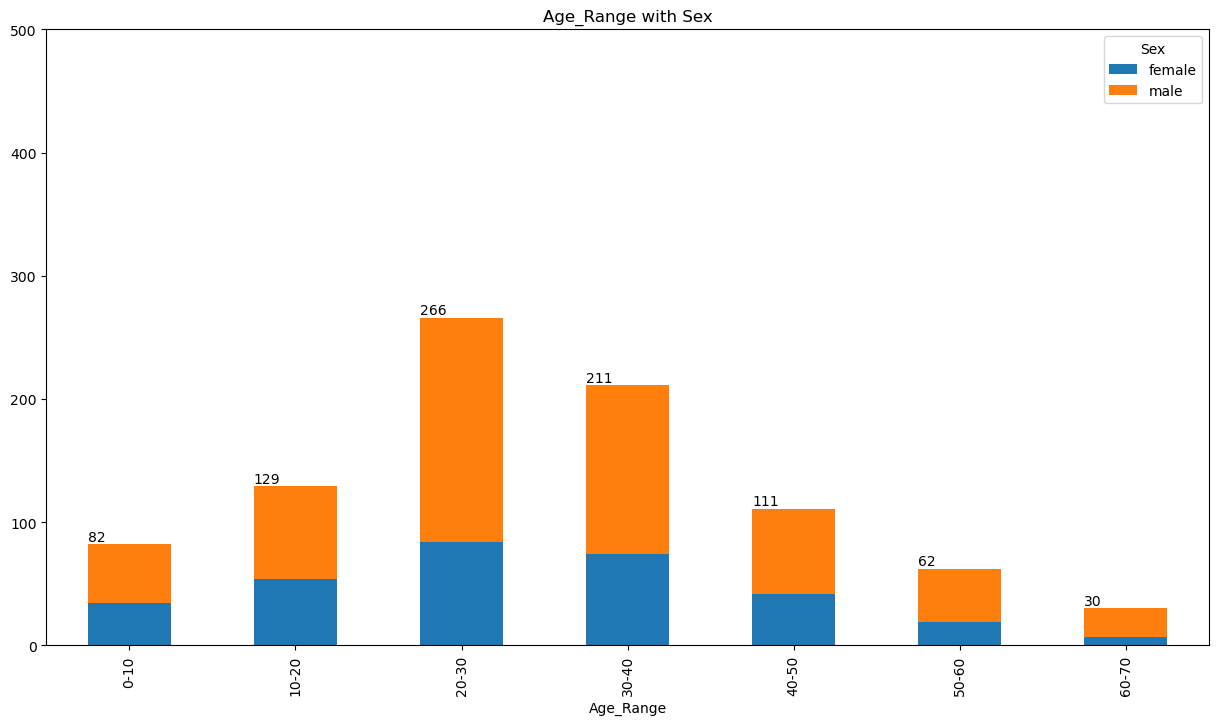

In [49]:
df.groupby('Age_Range')['Sex'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True,figsize=(15,8))

#score at each bar of plot
for i, v in enumerate(df.groupby('Age_Range') \
                      .agg({'Sex': lambda x: len(x)})['Sex']):
    plt.text(i - .25, v + 3, int(v), color='black')
axes = plt.gca()

#setting y limit of plot
axes.set_ylim([0, 500])
plt.title('Age_Range with Sex')

# **Grouping data of Age_range with Survived**

Text(0.5, 1.0, 'Age_Range with Survived or died')

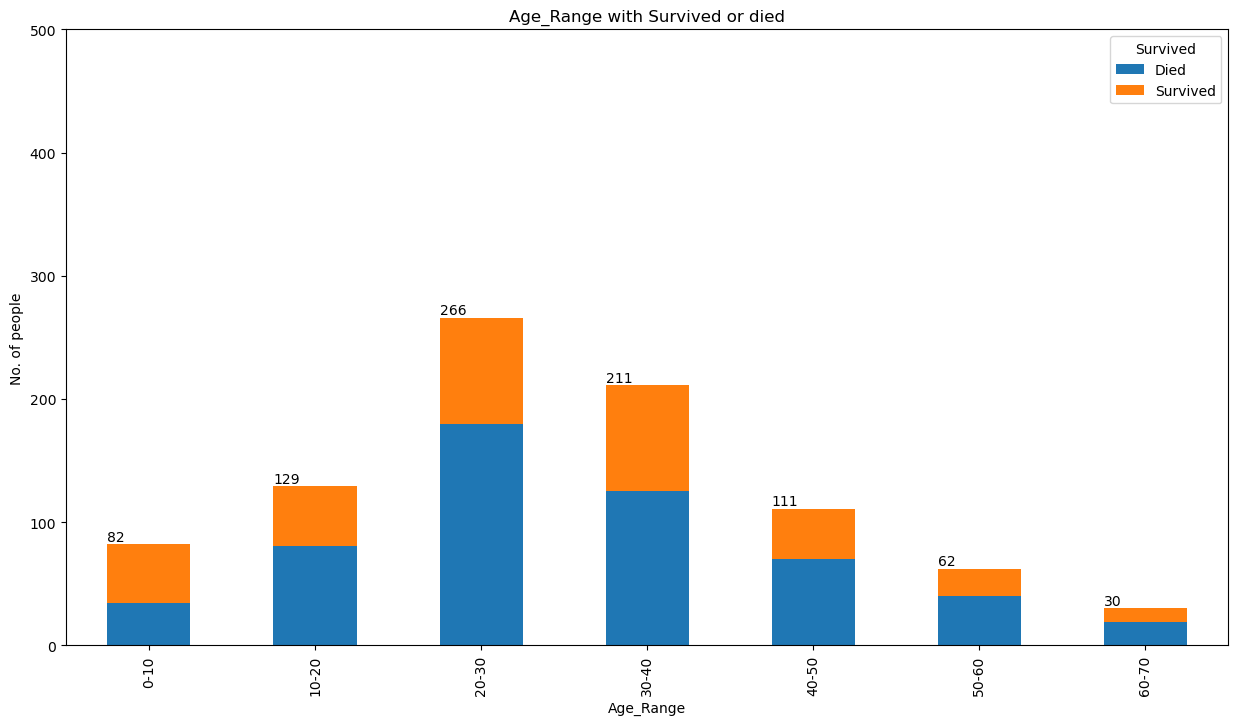

In [50]:
df.groupby('Age_Range')['Survived'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True,figsize=(15,8))

#score at each bar of plot
for i, v in enumerate(df.groupby('Age_Range') \
                      .agg({'Survived': lambda x: len(x)})['Survived']):
    plt.text(i - .25, v + 3, int(v), color='black')
axes = plt.gca()

#setting y limit of plot
plt.ylabel('No. of people')
axes.set_ylim([0, 500])
plt.title('Age_Range with Survived or died')

# **Poisson distribution for age**

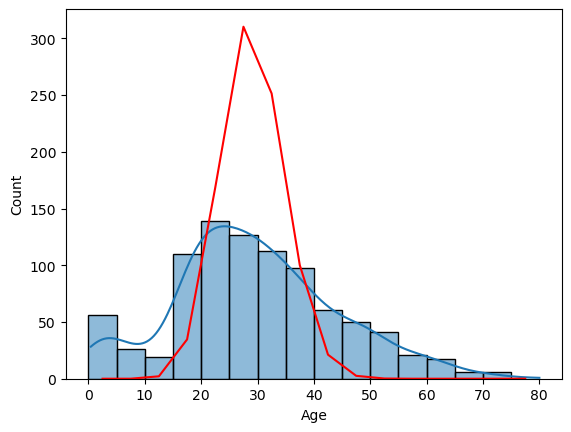

In [51]:
binwidth = 5
xstart = 0
xend = 80
bins = np.arange(xstart,xend,binwidth)

o = sns.histplot(df['Age'], kde=True,bins = bins)
mu = df['Age'].mean() 
n = len(df['Age'])
plt.plot(bins + binwidth/2 , (n)*(poisson.cdf(bins+binwidth,mu) - poisson.cdf(bins,mu)), color='red')


# **Non-linear trendline for fare**

In [52]:
px.scatter(df,x='Fare', trendline="expanding",trendline_scope="overall",title='Non-Linear trendline for fare')

# **Linear trendline for age**

In [53]:
px.scatter(df,x='Age', trendline="ols",trendline_scope="overall",title='Linear trendline for age')

# **Swarm plot Embarked by Age**

Text(0.5, 1.0, 'Swarm plot Embarked by Age')

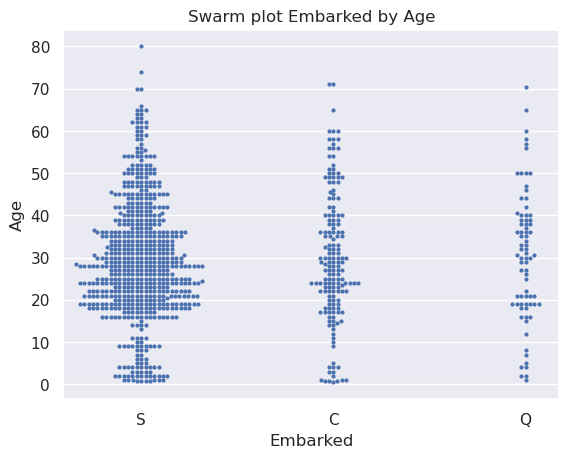

In [54]:
sns.set()
sns.swarmplot(x='Embarked',y='Age',data=df,size=3)
plt.xlabel('Embarked')
plt.ylabel('Age')
plt.margins(0.05)
plt.title('Swarm plot Embarked by Age')

**Project by<br>**
**Rakesh kudmulwar<br>**
 [linkedin](https://www.linkedin.com/in/rakesh-kudmulwar-b21a89152/) **|** [GitHub](https://github.com/Rakesh-Kudmulwar)